<a href="https://colab.research.google.com/github/Alexoswin/AIML_Drug_rehab/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/MiniProject/drug_rehab.csv',encoding='unicode_escape')

In [ ]:
df.head()

,Age,Gender,Educated,Living with,Conflict with Law,Criminal Record,Spends Most Time With,Failure in Life,Mental/Emotional Problem,Suicidal Thoughts,...,No. of Friends,Satisfied with Workspace,Living with Drug Consumer,Smoking,Influenced By,Ease to Control Drug Use,Frequency of Drug Usage per Week,Days Taken to Get Cure,City,Type of Drug Consumed
0,28,Male,Yes,Family,No,No,Family,No,Depression,Yes,...,10,Yes,Yes,Yes,Peer Pressure,Yes,3,60,Mumbai,Cocaine
1,35,Female,Yes,Friends,Yes,Yes,Friends,Yes,Anxiety,Yes,...,5,No,No,No,Stress,No,5,90,Delhi,Heroin
2,22,Others,Yes,Alone,No,No,Alone,Yes,Anger,Yes,...,8,Yes,Yes,Yes,Trauma,Yes,2,45,Kolkata,Methamphetamine
3,40,Male,No,Family,Yes,Yes,Family,No,Low Self-Esteem,Yes,...,6,Yes,No,Yes,Stress,No,4,75,Chennai,Marijuana
4,31,Female,Yes,Friends,No,No,Friends,Yes,Depression,Yes,...,7,Yes,Yes,Yes,Peer Pressure,Yes,6,100,Mumbai,Cocaine


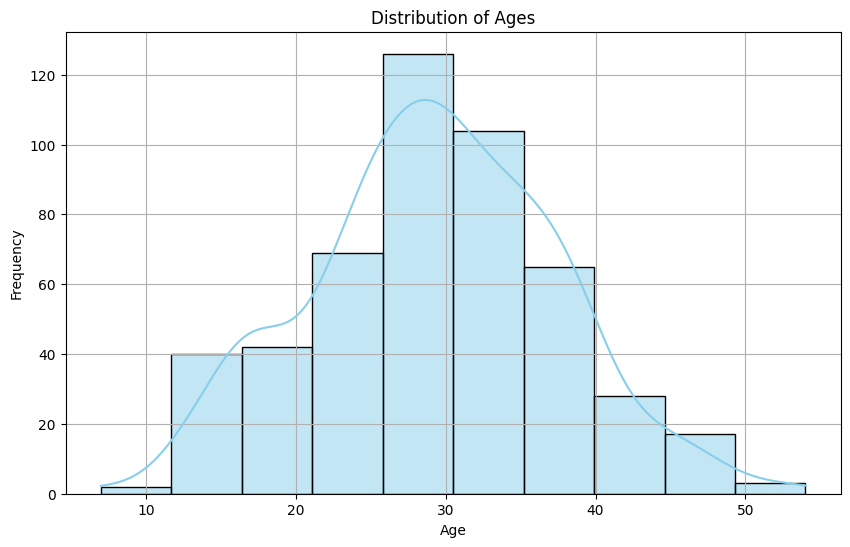

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


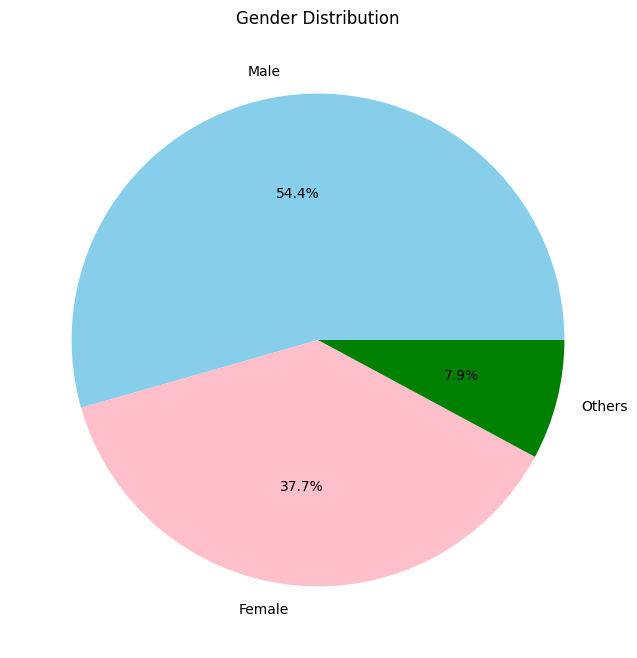

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of individuals for each gender
gender_counts = df['Gender'].value_counts()

# Plot the gender distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'pink','green'])
plt.title('Gender Distribution')
plt.show()


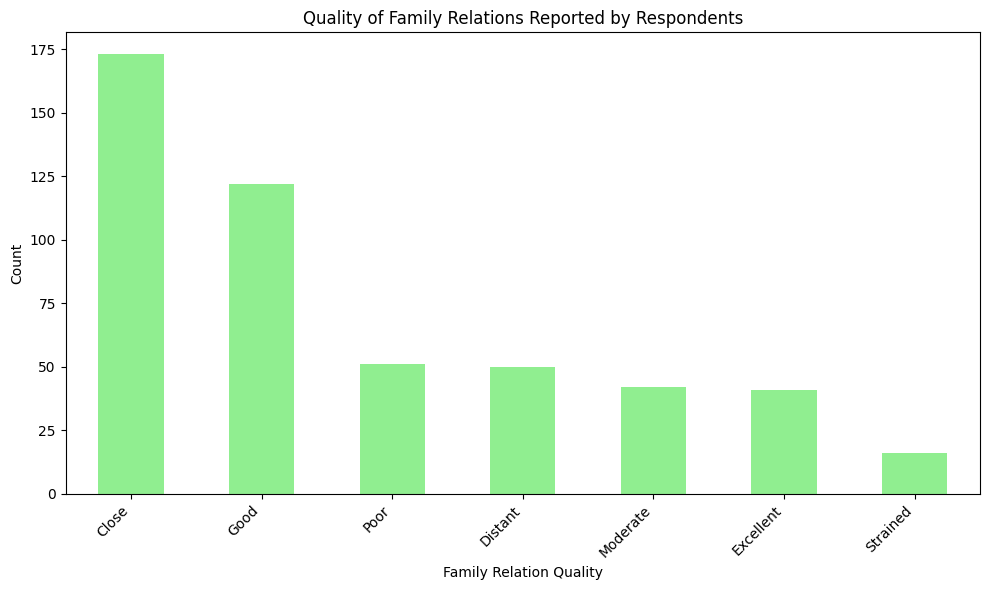

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the frequency/count of responses indicating different levels of family relations quality
family_relations_counts = df['Family Relation'].value_counts()

# Plot the distribution of family relations quality using a bar plot
plt.figure(figsize=(10, 6))
family_relations_counts.plot(kind='bar', color='lightgreen')
plt.title('Quality of Family Relations Reported by Respondents')
plt.xlabel('Family Relation Quality')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


<Figure size 1200x800 with 0 Axes>

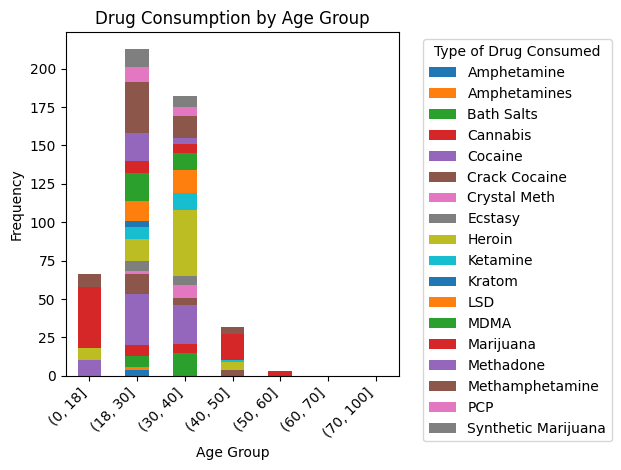

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Define age bins
age_bins = [0, 18, 30, 40, 50, 60, 70, 100]  # Define the age bins as per your requirement

# Create age groups using the defined bins
age_groups = pd.cut(df['Age'], bins=age_bins)

# Group the data by age group and type of drug consumed, and count the frequency
age_drug_counts = df.groupby([age_groups, 'Type of Drug Consumed']).size().unstack(fill_value=0)

# Plot the distribution of drug consumption among different age groups using a stacked bar plot
plt.figure(figsize=(12, 8))
age_drug_counts.plot(kind='bar', stacked=True)
plt.title('Drug Consumption by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Type of Drug Consumed', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd



# Calculate the total frequency of each drug consumed
total_drug_counts = df['Type of Drug Consumed'].value_counts()

# Print the total frequency of each drug consumed
print("Total Frequency of Each Type of Drug Consumed:")
print(total_drug_counts)


Total Frequency of Each Type of Drug Consumed:
Marijuana              74
Heroin                 70
Cocaine                68
Methamphetamine        60
MDMA                   29
LSD                    28
Bath Salts             22
Methadone              22
Crack Cocaine          22
Ketamine               20
Synthetic Marijuana    19
PCP                    16
Ecstasy                13
Cannabis               13
Crystal Meth           10
Amphetamine             4
Kratom                  4
Amphetamines            2
Name: Type of Drug Consumed, dtype: int64


In [ ]:
import pandas as pd



# Group the data by gender and calculate the total frequency of drug usage
drug_usage_gender = df.groupby('Gender')['Frequency of Drug Usage per Week'].sum()

# Print the frequency of drug usage based on gender
print("Frequency of Drug Usage per Week based on Gender:")
print(drug_usage_gender)


Frequency of Drug Usage per Week based on Gender:
Gender
Female    2537
Male      3983
Others     499
Name: Frequency of Drug Usage per Week, dtype: int64


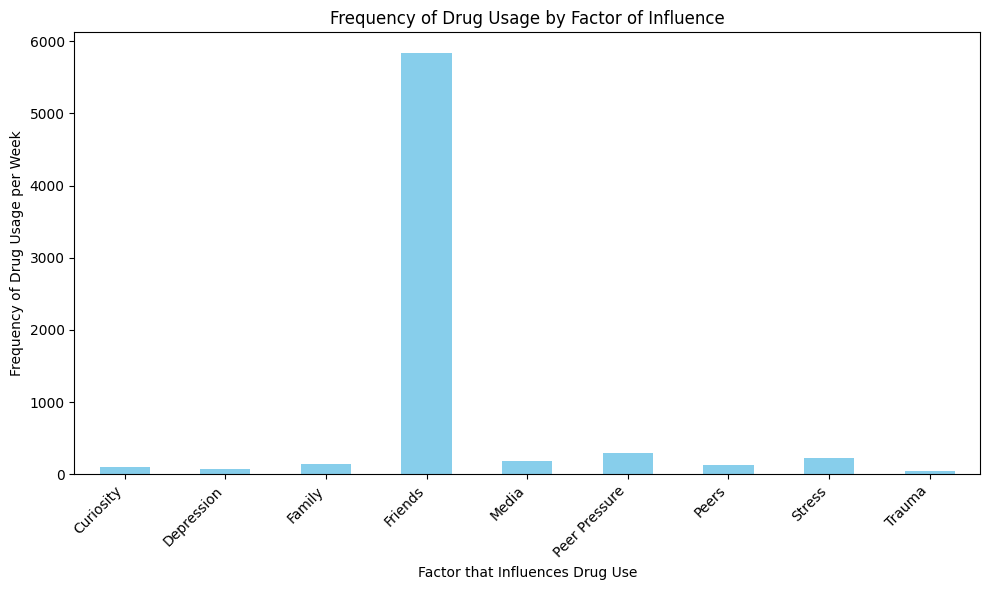

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by the factor that influences drug use and calculate the total frequency of drug usage
drug_usage_factor = df.groupby('Influenced By')['Frequency of Drug Usage per Week'].sum()

# Plot the frequency of drug usage based on the factor that influences drug use
plt.figure(figsize=(10, 6))
drug_usage_factor.plot(kind='bar', color='skyblue')
plt.title('Frequency of Drug Usage by Factor of Influence')
plt.xlabel('Factor that Influences Drug Use')
plt.ylabel('Frequency of Drug Usage per Week')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<ipython-input-48-d7c75d225e40>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result_df.index, y=result_df['Max Frequency'], palette='viridis')


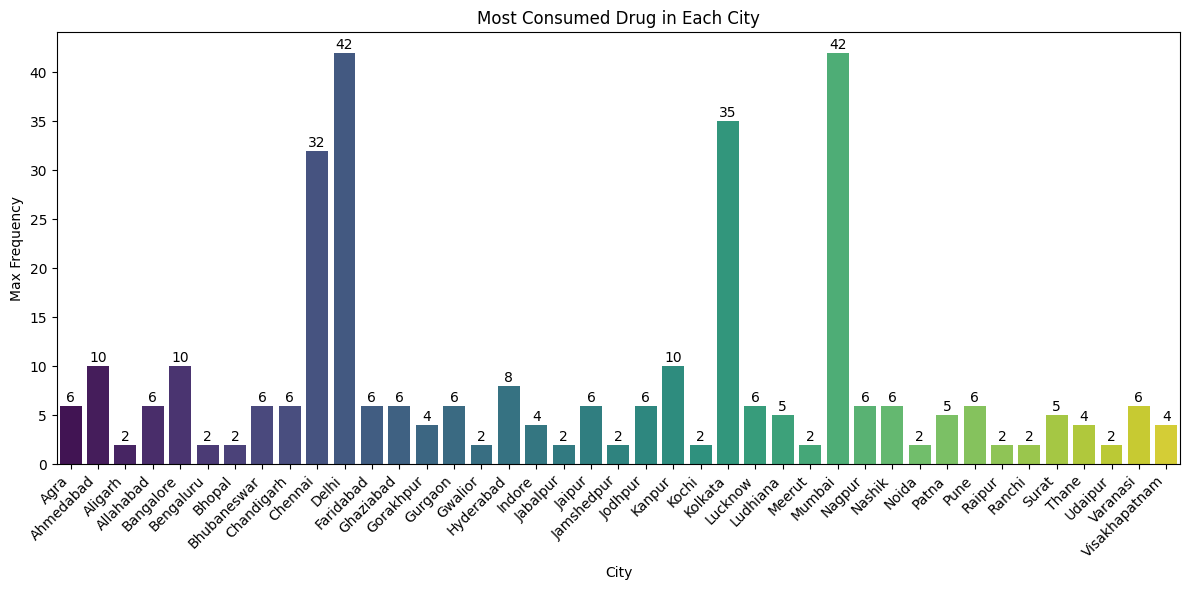

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a pivot table to calculate the maximum frequency of each drug type in each city
city_drug_max = df.pivot_table(index='City', columns='Type of Drug Consumed', aggfunc='size', fill_value=0)

# Find the most consumed drug type in each city
most_consumed_drug_by_city = city_drug_max.idxmax(axis=1)
max_frequency_by_city = city_drug_max.max(axis=1)

# Create a DataFrame to display the results
result_df = pd.DataFrame({'Most Consumed Drug': most_consumed_drug_by_city, 'Max Frequency': max_frequency_by_city})

# Plot the graph
plt.figure(figsize=(12, 6))
sns.barplot(x=result_df.index, y=result_df['Max Frequency'], palette='viridis')
plt.title('Most Consumed Drug in Each City')
plt.xlabel('City')
plt.ylabel('Max Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Add data labels
for i, frequency in enumerate(result_df['Max Frequency']):
    plt.text(i, frequency + 0.1, str(frequency), ha='center', va='bottom')

plt.show()


In [ ]:
import pandas as pd



# Find the highest and lowest number of days taken to get cured
highest_days_to_cure = df['Days Taken to Get Cure'].max()
lowest_days_to_cure = df['Days Taken to Get Cure'].min()

print("Highest number of days taken to get cured:", highest_days_to_cure)
print("Lowest number of days taken to get cured:", lowest_days_to_cure)


Highest number of days taken to get cured: 200
Lowest number of days taken to get cured: 30


<ipython-input-53-5c5afd0928ec>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_days_cured_by_age.index, y=median_days_cured_by_age.values, palette='magma')


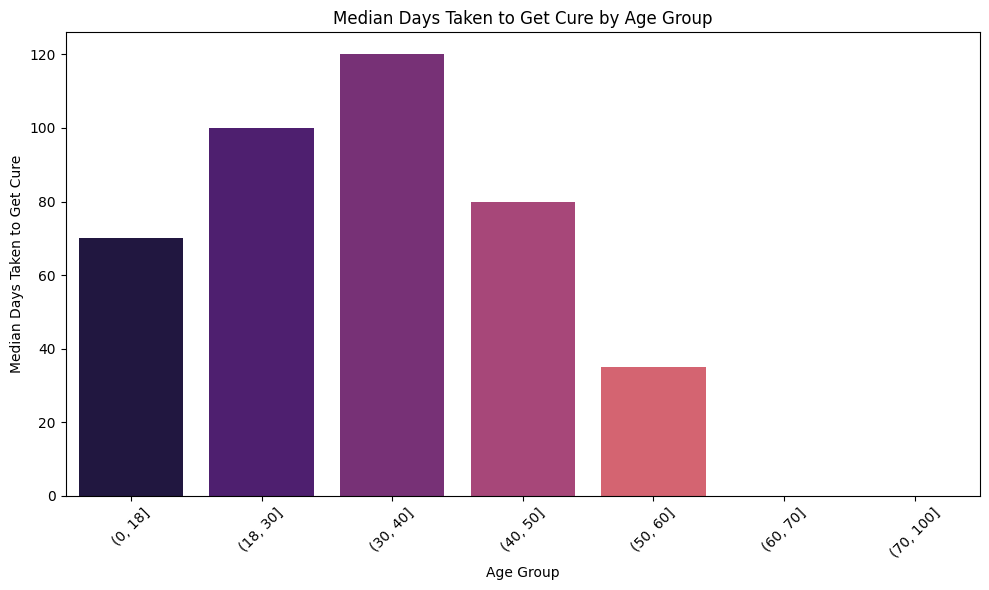

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




age_bins = [0, 18, 30, 40, 50, 60, 70, 100]  # Define the age bins as per your requirement
df['Age Group'] = pd.cut(df['Age'], bins=age_bins)

# Calculate the median number of days taken to get cured for each age group
median_days_cured_by_age = df.groupby('Age Group')['Days Taken to Get Cure'].median().sort_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=median_days_cured_by_age.index, y=median_days_cured_by_age.values, palette='magma')
plt.title('Median Days Taken to Get Cure by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Days Taken to Get Cure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-54-79974362e489>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_days_cured_by_gender.index, y=median_days_cured_by_gender.values, palette='Set2')


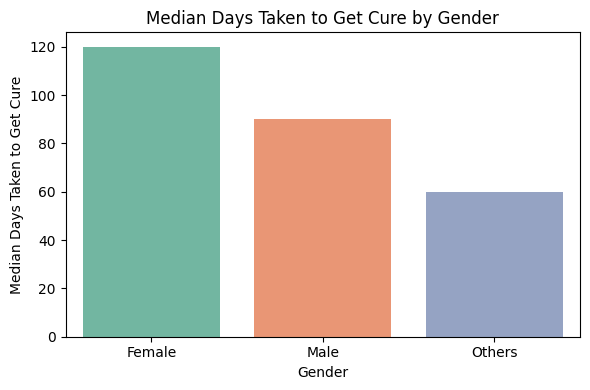

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the median number of days taken to get cured for each gender
median_days_cured_by_gender = df.groupby('Gender')['Days Taken to Get Cure'].median().sort_index()

# Plotting the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=median_days_cured_by_gender.index, y=median_days_cured_by_gender.values, palette='Set2')
plt.title('Median Days Taken to Get Cure by Gender')
plt.xlabel('Gender')
plt.ylabel('Median Days Taken to Get Cure')
plt.tight_layout()
plt.show()


<ipython-input-56-fc5ad9abf077>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drug_usage_by_financial_status.index, y=drug_usage_by_financial_status.values, palette='coolwarm')


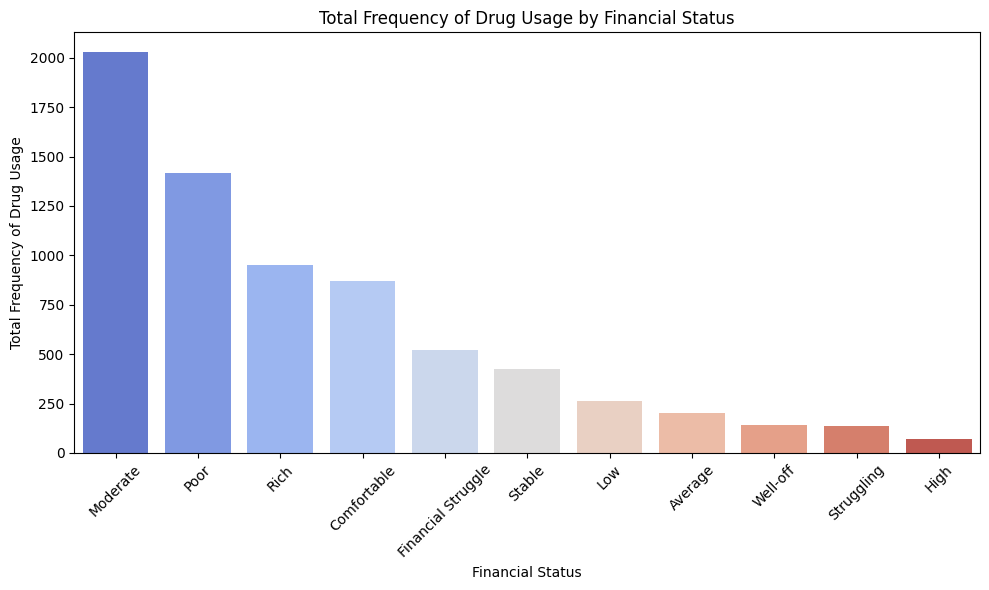

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Group the data by financial status and calculate the total frequency of drug usage
drug_usage_by_financial_status = df.groupby('Financial Status')['Frequency of Drug Usage per Week'].sum().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=drug_usage_by_financial_status.index, y=drug_usage_by_financial_status.values, palette='coolwarm')
plt.title('Total Frequency of Drug Usage by Financial Status')
plt.xlabel('Financial Status')
plt.ylabel('Total Frequency of Drug Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
